# Tutorial number 3 : IpyWidgets
In this really short Tutorial, we are going to discover the interactve plots with IpyWidgets.
As you will see, it is much simpler than the `event` handling method used in the previous tutorials,
but allows one to really great interactions !

## So, let's dive in :
Let's first import the classic packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

And now the new one : `ipywidget`, and its `interactive` method :

In [2]:
import ipywidgets as widgets
from ipywidgets import interactive

Let's redefine the galaxy model defined in the tutorial 2. Now, instead of returning the array of the galaxy, it directly plots it.

In [21]:
def sersic_model(mag, rad, ell, n=1):

    x, y = np.meshgrid(np.arange(64), np.arange(64))  # create a 64 x 64 array

    a = rad / 2  # define the major axis of the galaxy
    b = (1-ell) * a  # define the minor axis of the galaxy, by taking into account the ellipticity
    
    z = np.sqrt(((x-(64/2)) / a) ** 2 + ((y-(64/2)) / b) ** 2)  # define the distance to center
    
    
    galaxy = 10**(-0.4*(mag-23.5)) * np.exp(-(2*n-(1/3)) * (z ** (1 / n) - 1))  # sersic profile
    
    galaxy = galaxy + np.random.normal(0, 0.25, (64, 64))  # White noise

    plt.imshow(galaxy)

Let's try it : we want a big, elliptical and bright galaxy :


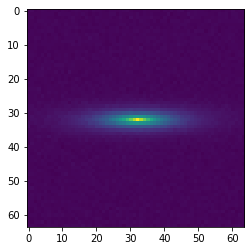

In [22]:
sersic_model(21, 25, 0.8)

### Now that we know it works, let's try the interactive widget !

The idea is to plot some sliding buttons to control the parameters of the function. We are going to create four buttons : one for the magnitude, one for the radius one for the ellipticity, and one for the sersic index (which define the steepness of the profile). By linking it to the sersic function, it will call it each time we move a button. This way, we can plot any galaxy we want just by moving some buttons !

# Try it :

In [26]:
interactive_plot = interactive(sersic_model,
                               mag=(20, 26, 0.1),
                               rad=(0, 30, 1),
                               ell=(0, 0.99, 0.03),
                               n=(0.2, 2, 0.3))

output = interactive_plot.children[-1]

interactive_plot


interactive(children=(FloatSlider(value=23.0, description='mag', max=26.0, min=20.0), IntSlider(value=15, desc…

# Nice, right ?

## Let s look what we've done.
the `interactive` method take at least 2 parameters : the function you want to use, and then at least one sliding button. In fact, you need (in addition to the first parameter) as many button as there is parameters in the linked function. You need to give the name of the function params, and then the range and the step you want the parameters to move in. For example, we said that the magnitude parameter `mag` of our `sersic_model` function should move between 20 and 26, and each increment should ne 0.1.

You then just need to indicate the output, and to call the interaction...

You can see the expected behavior :
 - The highest the magnitude, the faintest the galaxy
 - The biggest the radius, the biggest the galaxy
 - The biggest the ellipticity, the biggest the elongation
 - The biggest the sersic index n, the steepest the profile
 
# Simple right ?

This tutorial is under construction, more examples will be added !